In [1]:
import graphlab
import numpy as np
import math
import matplotlib.pyplot as plt
import random
%matplotlib inline

This non-commercial license of GraphLab Create for academic use is assigned to saranshagarwal_2k14@dtu.ac.in and will expire on September 05, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1476115358.log


In [2]:
random.seed(98103)
n = 30
x = graphlab.SArray([random.random() for i in range(n)]).sort()

In [4]:
y = x.apply(lambda x: math.sin(4*x))

In [5]:
random.seed(1)
e = graphlab.SArray([random.gauss(0,1.0/3.0) for i in range(n)])
y = y + e

In [6]:
data = graphlab.SFrame({'X1':x,'Y':y})
data

X1,Y
0.0395789449501,0.587050191026
0.0415680996791,0.648655851372
0.0724319480801,0.307803309485
0.150289044622,0.310748447417
0.161334144502,0.237409625496
0.191956312795,0.705017157224
0.232833917145,0.461716676992
0.259900980166,0.383260507851
0.380145814869,1.06517691429
0.432444723508,1.03184706949


In [9]:
def plot_data(data):
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

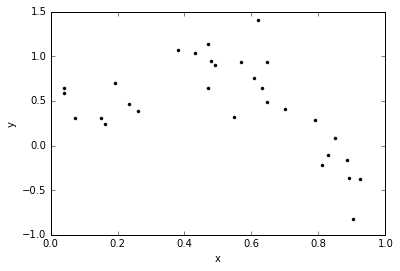

In [10]:
plot_data(data)

In [11]:
def polynomial_features(data,deg):
    data_copy = data.copy()
    for i in range(1,deg):
        data_copy['X'+str(i+1)] = data_copy['X'+str(i)]*data['X1']
    return data_copy

In [12]:
def polynomial_regression(data,deg):
    model = graphlab.linear_regression.create(polynomial_features(data,deg),target='Y',l2_penalty=0,l1_penalty=0,validation_set=None,verbose=False)
    return model

In [29]:
def plot_poly_prediction(data,model):
    plot_data(data)
    
    deg = len(model.coefficients['value'])-1
    
    x_pred = graphlab.SFrame({'X1':[i/200 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred,deg))
    
    plt.plot(x_pred['X1'],y_pred,'g-',label = 'degree' + str(deg) + 'fit')
    plt.legend(loc = 'upper left')
    plt.axis([0,1,-1.5,2])

In [30]:
def print_coeeficients(model):
    degree = len(model.coefficients['value'])-1
    
    w = list(model.coefficients['value'])
    
    print 'Learned polynomial for degree ' + str(degree) + ':\n'
    
    w.reverse()
    print np.poly1d(w)

In [31]:
model = polynomial_regression(data,deg=2)

In [32]:
print_coeeficients(model)

Learned polynomial for degree 2:

        2
-5.129 x + 4.147 x + 0.07471


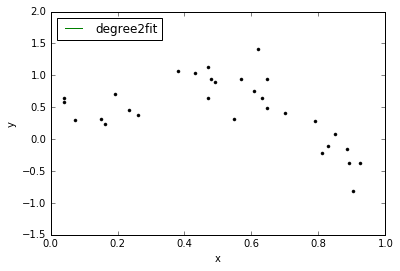

In [33]:
plot_poly_prediction(data,model)